<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#3B6790;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Introduction
    </h1>
    </div>

___
## <font color="#09122C">About Heart Failure:</font>
<font color="#213555">หัวใจล้มเหลวเกิดขึ้นเมื่อกล้ามเนื้อหัวใจสูบฉีดเลือดได้ไม่ดีเท่าที่ควร ทำให้เกิดอาการต่างๆ เช่น หายใจไม่สะดวก เหนื่อยล้า และมีของเหลวสะสมในปอดและเนื้อเยื่ออื่นๆ ภาวะนี้อาจเป็นผลมาจากปัจจัยต่างๆเช่น โรคหลอดเลือดหัวใจ ความดันโลหิตสูง และเบาหวาน.</font>

## <font color="#09122C">About the Dataset:</font>
<font color="#213555">ชุดข้อมูลการทำนายภาวะหัวใจล้มเหลวประกอบด้วยลักษณะทางคลินิก 11 รายการที่เกี่ยวข้องกับเหตุการณ์โรคหัวใจได้แก่:</font>

1. <font color="#213555">Age: อายุของผู้ป่วย  [ปี]</font>
2. <font color="#213555">Sex: เพศของผู้ป่วย [M: ชาย, F: หญิง] </font>
3. <font color="#213555">ChestPainTye: ประเภทของอาการเจ็บหน้าอก [TA: เจ็บหน้าอกแบบโรคหลอดเลือดหัวใจ , ATA: เจ็บหน้าอกแบบผิดปกติ , NAP: เจ็บหน้าอกที่ไม่เกี่ยวกับโรคหัวใจ , ASY: ไม่มีอาการเจ็บหน้าอก]</font>
4. <font color="#213555">RestingB: ค่าความดันโลหิตขณะพัก  [mm Hg]</font>
5. <font color="#213555">Cholestero: ค่าคอเลสเตอรอลในเลือด [mm/dl]</font>
6. <font color="#213555">FastingBS: ค่าน้ำตาลในเลือดขณะอดอาหาร [1: มากกว่า 120 > 120 mg/dl, 0: ไม่เกิน 120 mg/dL]</font>
7. <font color="#213555">RestingECG: ผลลัพธ์ของคลื่นไฟฟ้าหัวใจขณะพัก [Normal:ปกติ, ST: คลื่นไฟฟ้าหัวใจผิดปกติ (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: มีภาวะกล้ามเนื้อหัวใจหนาตัว]</font>
8. <font color="#213555">MaxHR: อัตราการเต้นของหัวใจสูงสุดที่ทำได้ [Numeric value between 60 and 202]</font>
9. <font color="#213555">ExerciseAngina**: อาการเจ็บหน้าอกขณะออกกำลังกาย [Y: Yes, N: No]</font>
10. <font color="#213555">Oldpeak: ค่า ST depression  [ใช้ประเมินภาวะขาดเลือด]</font>
11. <font color="#213555">ST_Slope: ลักษณะความชันของ ST segment [Up: สูงขึ้น, Flat: คงที่, Down: ลดลง]</font>
___

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#3B6790;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Reference code
    </h1>
    </div>
    
## Code from
### - Heart Failure Prediction🫀🏥| Streamlit App ab0231 [click here](https://www.kaggle.com/code/ahmedismaiil/heart-failure-prediction-streamlit-app)
    > Handling Missing Data
    > Detection Outliers
    > Data Preprocessing
    > Model (Random Forest/Xgboost) เปลี่ยนเป็น Decision Tree
    

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#3B6790;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Import Library
    </h1>
    </div>
    

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import warnings

warnings.filterwarnings('ignore')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#3B6790;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Reading Data And get Info
    </h1>
    </div>

## **Show Sample of Data**

In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
439,74,M,NAP,138,0,0,Normal,116,N,0.2,Up,0
427,59,M,ASY,140,0,0,ST,117,Y,1.0,Flat,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1
892,39,F,NAP,138,220,0,Normal,152,N,0.0,Flat,0
282,51,F,NAP,130,220,0,Normal,160,Y,2.0,Up,0


## **Show info of Data**

In [3]:
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 918
Number of Columns : 12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Check NaN Value
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# Describe Numiric Data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 📌 ข้อผิดพลาดที่พบในการเก็บข้อมูลมี 3 จุดหลัก
    > ค่าต่ำสุดของ 2 คอลัมน์ (RestingBP, Cholesterol) เป็น 0
    > ค่า Oldpeak มีค่าต่ำสุดเป็น -2.6 

In [7]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Age,918,0,0.0,50
Sex,918,0,0.0,2
ChestPainType,918,0,0.0,4
RestingBP,918,0,0.0,67
Cholesterol,918,0,0.0,222
FastingBS,918,0,0.0,2
RestingECG,918,0,0.0,3
MaxHR,918,0,0.0,119
ExerciseAngina,918,0,0.0,2
Oldpeak,918,0,0.0,53


 <div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#3B6790;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Handling Missing Data
    </h1>
   </div>

## การจัดการค่าที่ไม่สมเหตุสมผล (Handling Not Realistic Values)
    1️⃣ ปัญหาค่า Oldpeak ติดลบ
    2️⃣ ปัญหาค่า 0 ในคอลัมน์ RestingBP และ Cholesterol  -> เปลี่ยนค่า 0 เป็น NaN (missing values)
    3️⃣ การเติมค่าที่หายไป (Missing Values)

In [8]:
df[df['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


In [9]:
# Change negative values to positive values
df['Oldpeak'] = df['Oldpeak'].abs()

In [10]:
df[['RestingBP','Cholesterol']] = df[['RestingBP','Cholesterol']].replace(0,np.nan)
# Show Number of Missing Values (NaN)
df[['RestingBP','Cholesterol']].isna().sum()

RestingBP        1
Cholesterol    172
dtype: int64

In [11]:
# Show Status of HeartDisease which NaN in RestingBP
df[df['RestingBP'].isna()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,NaN,NaN,0,Normal,155,N,1.5,Flat,1


In [12]:
# Fill Missing Value with median of people has Heart Disease
df['RestingBP'] = df['RestingBP'].fillna(df.groupby('HeartDisease')['RestingBP'].median()[1])
temp = df.groupby('HeartDisease')['Cholesterol'].median()
df.loc[(df['Cholesterol'].isna()) & (df['HeartDisease'] == 0), 'Cholesterol'] = temp[0]
df.loc[(df['Cholesterol'].isna()) & (df['HeartDisease'] == 1), 'Cholesterol'] = temp[1]

In [13]:
# After Fill Missing Values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

 <div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#3B6790;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Detection Outliers
    </h1>
   </div>

In [14]:
def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Finding outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

Age: 0 outliers detected
RestingBP: 27 outliers detected
Cholesterol: 41 outliers detected
MaxHR: 2 outliers detected
Oldpeak: 15 outliers detected


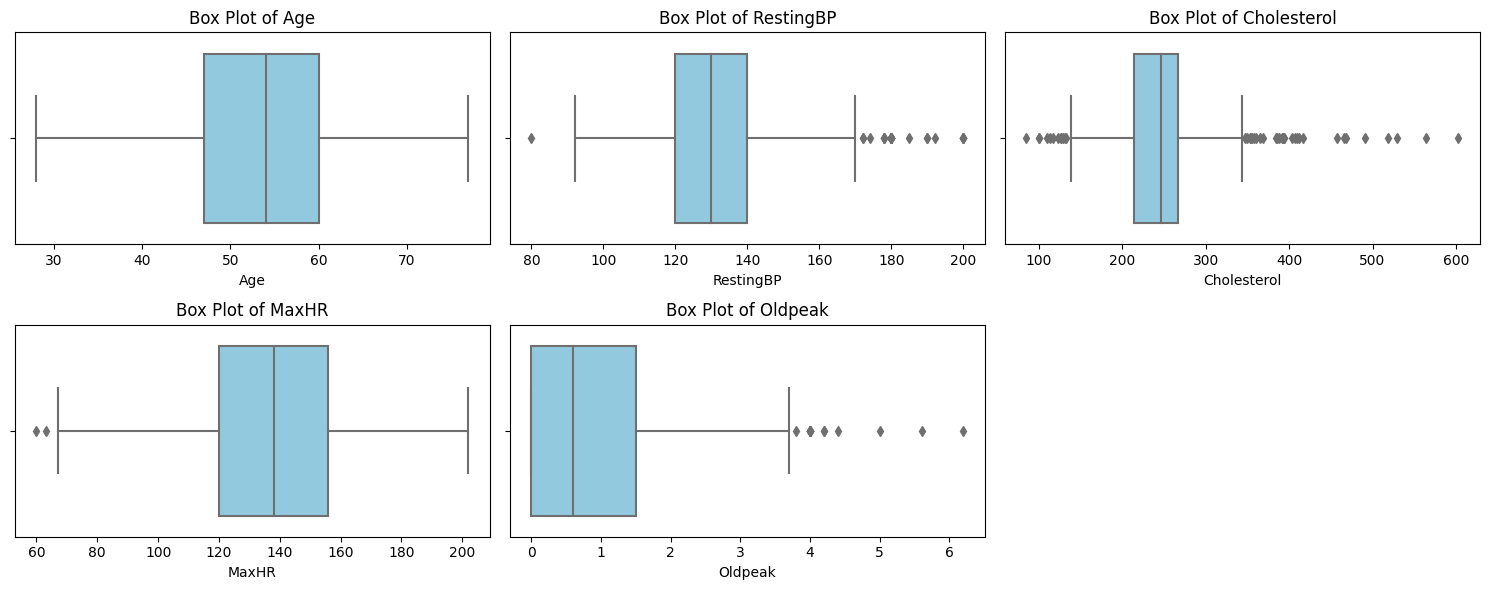

In [15]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(x = df[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

## **Cleaned Data BoxPlot To Show Outliers**

In [16]:
def remove_outliers(df, columns, threshold=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)  # First quartile (25%)
        Q3 = df_clean[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        df_clean = df_clean[(df_clean[col] > lower_bound) & (df_clean[col] < upper_bound)]
    
    return df_clean

df_cleaned = remove_outliers(df, numerical_columns)

In [17]:
# The New of Shape Cleaned Data
print(f"Number of Row : {df_cleaned.shape[0]}\nNumber of Columns : {df_cleaned.shape[1]}")

Number of Row : 824
Number of Columns : 12


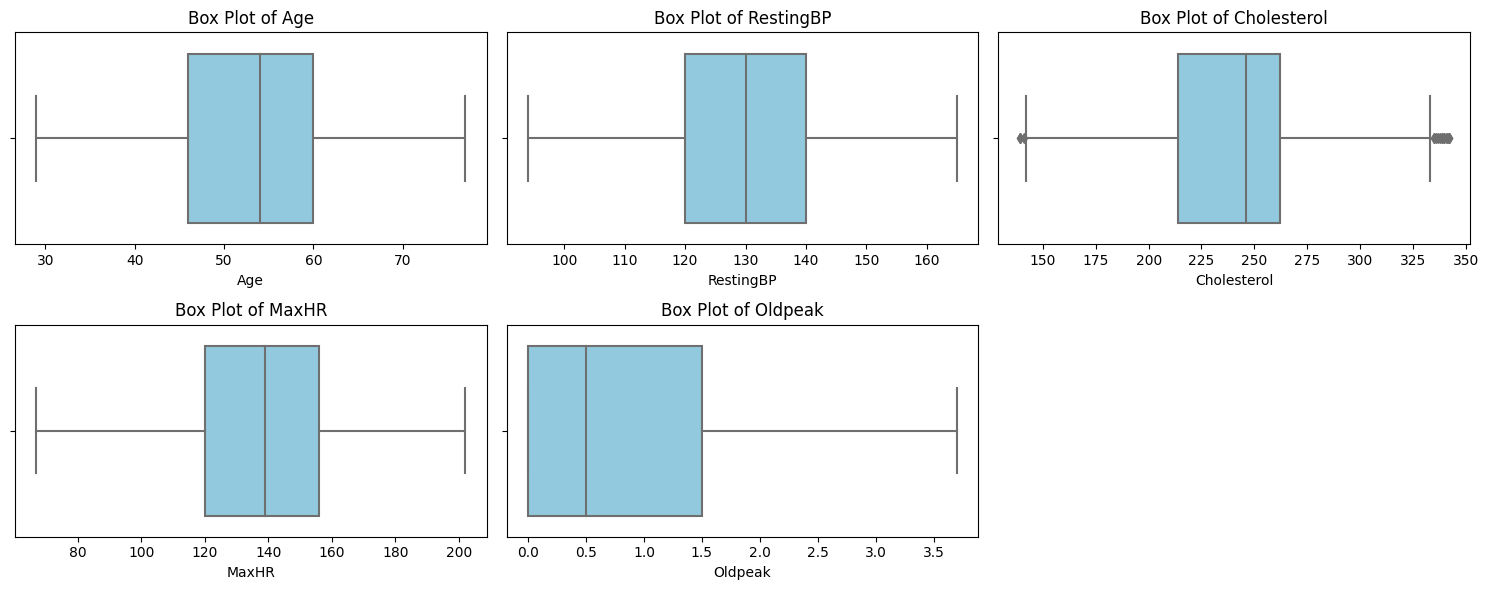

In [18]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(x = df_cleaned[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [19]:
df_cleaned.reset_index(inplace = True , drop = True)
df_cleaned.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
222,45,M,ASY,130.0,219.0,0,ST,130,Y,1.0,Flat,1
419,42,M,NAP,134.0,240.0,0,Normal,160,N,0.0,Up,0
241,45,M,ASY,120.0,225.0,0,Normal,140,N,0.0,Up,0
413,41,M,ASY,104.0,231.5,0,ST,111,N,0.0,Up,0
337,47,M,NAP,155.0,246.0,0,Normal,118,Y,1.0,Flat,1


In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             824 non-null    int64  
 1   Sex             824 non-null    object 
 2   ChestPainType   824 non-null    object 
 3   RestingBP       824 non-null    float64
 4   Cholesterol     824 non-null    float64
 5   FastingBS       824 non-null    int64  
 6   RestingECG      824 non-null    object 
 7   MaxHR           824 non-null    int64  
 8   ExerciseAngina  824 non-null    object 
 9   Oldpeak         824 non-null    float64
 10  ST_Slope        824 non-null    object 
 11  HeartDisease    824 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 77.4+ KB


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#3B6790;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Data Preprocessing
    </h1>
   </div>

## **Handling Object DataType**
    Encode Object DataType

In [21]:
column_to_encode = df.select_dtypes(object).columns.tolist()
le = LabelEncoder()
for column in column_to_encode:
    df_cleaned[column] = le.fit_transform(df_cleaned[column])
# Show Data After some of Encode
df_cleaned.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160.0,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130.0,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138.0,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150.0,195.0,0,1,122,0,0.0,2,0


In [22]:
# Final Info after Encode
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             824 non-null    int64  
 1   Sex             824 non-null    int64  
 2   ChestPainType   824 non-null    int64  
 3   RestingBP       824 non-null    float64
 4   Cholesterol     824 non-null    float64
 5   FastingBS       824 non-null    int64  
 6   RestingECG      824 non-null    int64  
 7   MaxHR           824 non-null    int64  
 8   ExerciseAngina  824 non-null    int64  
 9   Oldpeak         824 non-null    float64
 10  ST_Slope        824 non-null    int64  
 11  HeartDisease    824 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 77.4 KB


## **Assign feature and target variables**

In [23]:
X = df_cleaned.drop('HeartDisease' , axis = 1)
y = df_cleaned['HeartDisease']

## **Splitting Data**

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 44 , shuffle = True)

In [25]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (618, 11)
Shape of X_Test (206, 11)
Shape of Y_Train (618,)
Shape of Y_Test (206,)


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#3B6790;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Model
    </h1>
   </div>

In [26]:
def Kfold(model,model_name):
    model = cross_val_score(model , X , y , cv = 10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

## **Decision Tree**

In [27]:
model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=44)
# call functiom
Kfold(model, "Decision Tree")  
train(model, "Decision Tree")  
class_report(model)  

Decision Tree score on cross validation: 79.95592124595944%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 84.46601941747572%
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       106
           1       0.83      0.85      0.84       100

    accuracy                           0.84       206
   macro avg       0.84      0.84      0.84       206
weighted avg       0.84      0.84      0.84       206



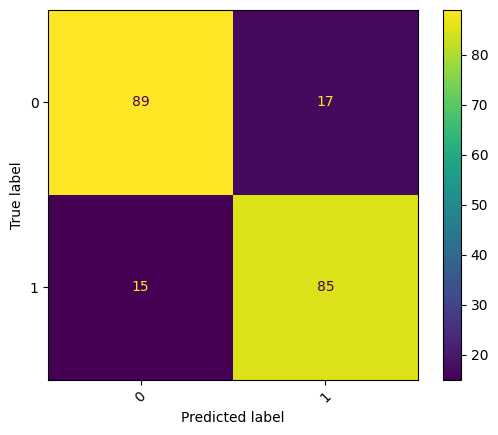

In [28]:
ConfusionMatrixDisplay.from_estimator(model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

## **ดึงกฎจาก Decision Tree**

In [29]:
tree_rules = export_text(model, feature_names=list(X_train.columns))
print(tree_rules)

|--- ST_Slope <= 1.50
|   |--- Sex <= 0.50
|   |   |--- ChestPainType <= 0.50
|   |   |   |--- Cholesterol <= 192.50
|   |   |   |   |--- class: 0
|   |   |   |--- Cholesterol >  192.50
|   |   |   |   |--- RestingECG <= 0.50
|   |   |   |   |   |--- Oldpeak <= 0.70
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Oldpeak >  0.70
|   |   |   |   |   |   |--- RestingBP <= 116.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- RestingBP >  116.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- RestingECG >  0.50
|   |   |   |   |   |--- Age <= 50.50
|   |   |   |   |   |   |--- Cholesterol <= 287.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Cholesterol >  287.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  50.50
|   |   |   |   |   |   |--- class: 1
|   |   |--- ChestPainType >  0.50
|   |   |   |--- Cholesterol <= 278.50
|   |   |   |   |--- MaxHR <= 105.50
|   |   |   |   |   |

## Save DecisionTree Model

In [30]:
joblib.dump(model, "DecisionTree_model.joblib")

['DecisionTree_model.joblib']